## LOADING ALL IMPORTANT LIBRARY

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

In [92]:
df = pd.read_csv("diabetes.csv")

In [93]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
df.shape

(768, 9)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [96]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [97]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Several medical features cannot realistically be zero, such as:
Glucose

BloodPressure

SkinThickness

Insulin

BMI

In [98]:
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [99]:
for col in invalid_zero_cols:
    df[col] = df[col].replace(0, np.nan)

In [100]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [101]:
for col in invalid_zero_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\laptop\AppData\Local\Temp\ipykernel_11456\3343570227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\laptop\AppData\Local\Temp\ipykernel_11456\3343570227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

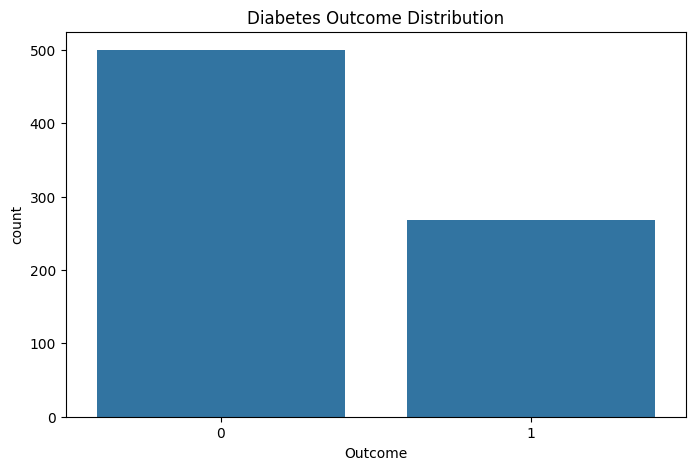

In [102]:
plt.figure(figsize=(8,5))
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

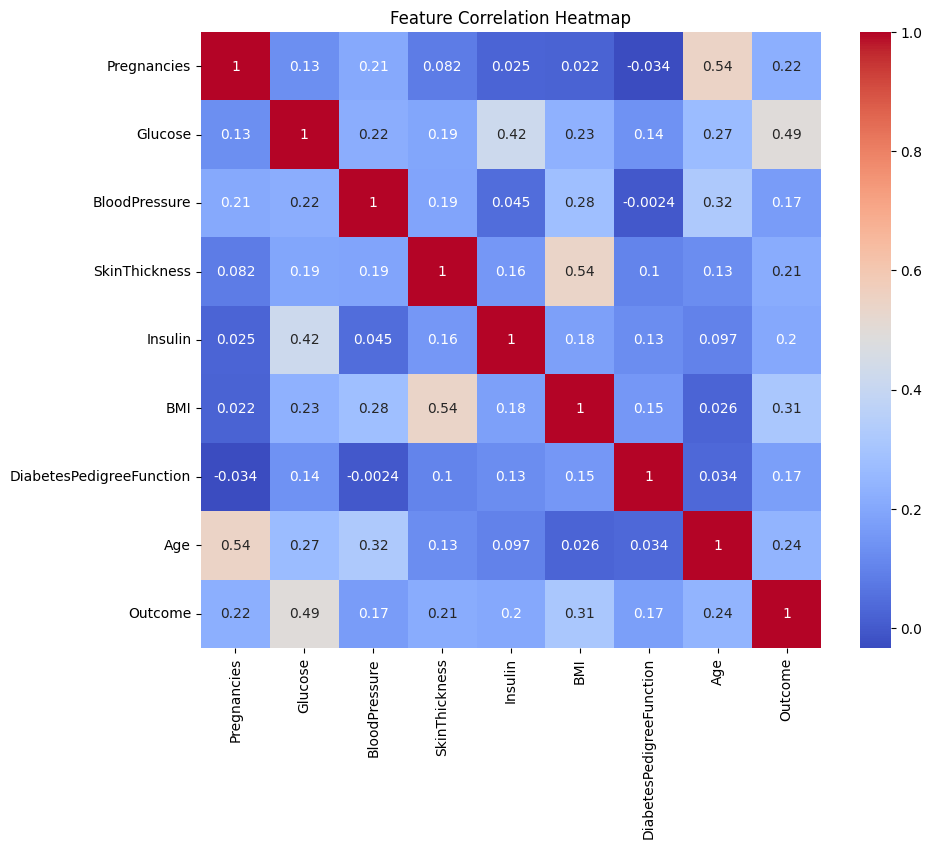

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [104]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## FEATURE SCALING

In [106]:
scaler = StandardScaler()

In [107]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1: Logistic Regression

In [108]:
log_reg = LogisticRegression(max_iter=1000)

In [109]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [110]:
y_pred_lr = log_reg.predict(X_test_scaled)

In [111]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



## Model 2: Linear Discriminant Analysis (LDA)

In [112]:
lda = LinearDiscriminantAnalysis()

In [113]:
lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [114]:
y_pred_lda = lda.predict(X_test_scaled)

In [115]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



## ROC Curve Comparison

In [116]:
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]
y_prob_lda = lda.predict_proba(X_test_scaled)[:,1]

In [117]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)

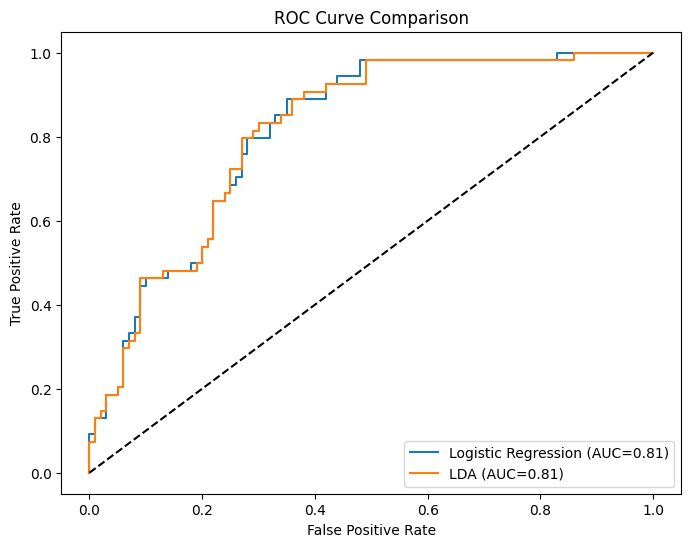

In [118]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc(fpr_lr, tpr_lr):.2f})")
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC={auc(fpr_lda, tpr_lda):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [119]:
feature_importance = pd.Series(
    log_reg.coef_[0], index=X.columns
).sort_values(ascending=False)

In [120]:
feature_importance

Glucose                     1.182511
BMI                         0.688735
Pregnancies                 0.377502
DiabetesPedigreeFunction    0.233386
Age                         0.147798
SkinThickness               0.028225
BloodPressure              -0.044066
Insulin                    -0.066157
dtype: float64